<a href="https://colab.research.google.com/github/ytg000629/ai4dl/blob/main/week2/chapter02_mathematical-building-blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [83]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [31]:
train_images.shape
#(28 X 28)이 60000개

(60000, 28, 28)

In [32]:
train_images[0].shape

(28, 28)

In [33]:
len(train_labels)

60000

In [34]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [35]:
import pandas as pd
df = pd.DataFrame(train_labels)
df.value_counts()

#10 categories 0-9

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [36]:
test_images.shape
#(28 X 28)이 10000개

(10000, 28, 28)

In [37]:
len(test_labels)

10000

In [38]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [39]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),  #크기가 512인 layer
    layers.Dense(10, activation="softmax") #크기가 10인 layer
])

**The compilation step**

In [41]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [42]:
train_images.shape

(60000, 28, 28)

In [74]:
train_images = train_images.reshape((60000, 28 * 28)) #(60000, 784)으로 바꿈
train_images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [44]:
train_images[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [45]:
train_images[0].shape

(784,)

In [46]:
len(train_images[0])

784

In [47]:
len(train_images)

60000

In [92]:
a = np.array([[[1,3],[1,2]],[[1,1],[1,0]]])

In [93]:
a.shape

(2, 2, 2)

In [103]:
a.reshape(2,4)
#이런식으로 28*28이 (784,)으로 바뀜

array([[1, 3, 1, 2],
       [1, 1, 1, 0]])

In [99]:
train_images = train_images.astype("float32") / 255
#[0-255]의 값을 255로 나눠줌으로서 [0,1]의 값으로 만들어줌
train_images[0]

(28, 28)

In [50]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [49]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)
# batch_size가 100이라면 600번 update

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2663 - accuracy: 0.9230
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.1090 - accuracy: 0.9683
Epoch 3/5
469/469 [==============================] - 11s 23ms/step - loss: 0.0720 - accuracy: 0.9787
Epoch 4/5
469/469 [==============================] - 10s 22ms/step - loss: 0.0507 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0384 - accuracy: 0.9889


**Using the model to make predictions**

In [59]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits) 
predictions[0]

1/1 [==============================] - 0s 24ms/step


array([3.3822769e-08, 3.9938142e-10, 1.2285772e-06, 1.2582141e-05,
       1.4463085e-11, 1.3685248e-08, 3.2865850e-12, 9.9998432e-01,
       6.6720787e-08, 1.6533795e-06], dtype=float32)

In [52]:
predictions.shape
#layers.Dense(10, activation="softmax") 크기가 10인 layer 생성했기 때문
#test_images[0:10] 0개를 예측했음

(10, 10)

In [53]:
predictions[0].argmax() #가장 높은 확률값을 가진 인덱스

7

In [54]:
predictions[0][7]

0.9999843

In [55]:
test_labels[0]

7

**Evaluating the model on new data**

In [56]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0631 - accuracy: 0.9799
test_acc: 0.9799000024795532


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [60]:
import numpy as np
x = np.array(12)
x

array(12)

In [61]:
x.ndim

0

### Vectors (rank-1 tensors)

In [64]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [66]:
x.ndim

1

### Matrices (rank-2 tensors)

In [67]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [68]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [81]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [70]:
train_images.ndim

3

In [71]:
train_images.shape

(60000, 28, 28)

In [72]:
train_images.dtype
#unit은 양수만 가능한 데이터 타입. uint8 : 0~255

dtype('uint8')

In [73]:
type(train_images)

numpy.ndarray

**Displaying the fourth digit**

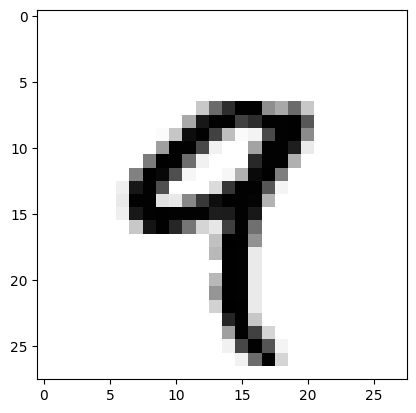

In [105]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
#imshow : array의 값들을 색으로 환산해 이미지의 형태로 보여줌
#0~1 사이의 숫자로 변환한 후 이미지로 나타냄
#reshape한 상태면 train_images[4]는 1차원 벡터기 때문에 오류남.
plt.show()

In [106]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [107]:
train_images.shape

(60000, 28, 28)

In [108]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [109]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [112]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape
#셋 다 같은 거임

(90, 28, 28)

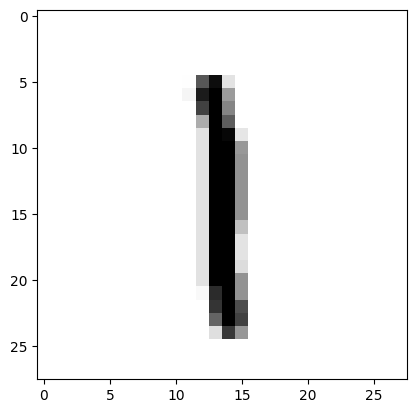

In [113]:
import matplotlib.pyplot as plt
digit = my_slice[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [118]:
my_slice = train_images[10:100, 7:-7, 7:-7]
# 7:-7 은 7부터 ->, -7부터 <-

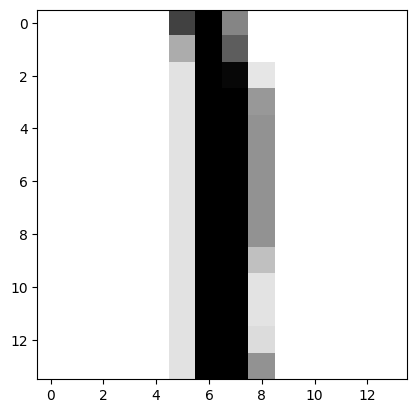

In [119]:
import matplotlib.pyplot as plt
digit = my_slice[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### The notion of data batches

batch_size = 128

In [120]:
batch = train_images[:128]

In [121]:
batch = train_images[128:256]

In [122]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations (요소별 연산)

In [123]:
def naive_relu(x):
    assert len(x.shape) == 2           #가정 설정문
    x = x.copy()                       #copy 해줘야함
    for i in range(x.shape[0]):        #행
        for j in range(x.shape[1]):    #열
            x[i, j] = max(x[i, j], 0)
    return x
    
#relu함수 구현

In [124]:
x= np.array([[1,2,3,4],[1,-1,-3,0]])
#len(x.shape) == 2 이어야함

In [125]:
naive_relu(x)

array([[1, 2, 3, 4],
       [1, 0, 0, 0]])

In [127]:
x
#원본 x는 안변함
#x.copy했기 때문

array([[ 1,  2,  3,  4],
       [ 1, -1, -3,  0]])

In [128]:
def naive_relu(x):
    assert len(x.shape) == 2 
    #copy 안함
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [129]:
x= np.array([[1,2,3,4],[1,-1,-3,0]])
naive_relu(x)

array([[1, 2, 3, 4],
       [1, 0, 0, 0]])

In [130]:
x
#copy 안쓰면 원본 x가 바뀜

array([[1, 2, 3, 4],
       [1, 0, 0, 0]])

In [131]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [132]:
x= np.array([[1,2,3,4],[1,-1,-3,0]])
y= np.array([[1,2,3,4],[1,-1,-3,0]])

In [133]:
naive_add(x,y)

array([[ 2,  4,  6,  8],
       [ 2, -2, -6,  0]])

In [134]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))
#shape가 (20,100)인 행렬 랜덤으로 생성, 0~1

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [135]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.18 s


for loop가 2개 있어서 vectorise 버전보다 naive operation이 시간이 더 오래 걸림

### Broadcasting

In [171]:
import numpy as np
X = np.random.random((32, 10)) 
y = np.random.random((10,))

In [148]:
X.shape

(32, 10)

In [149]:
y.shape

(10,)

In [150]:
y

array([0.56955224, 0.77870483, 0.79481222, 0.22206103, 0.32985817,
       0.31039173, 0.18811354, 0.35818644, 0.14166025, 0.8825468 ])

In [168]:
(X+y).shape
#브로드캐스팅 된 거

(32, 10)

브로드캐스팅 구현

In [172]:
y = np.expand_dims(y, axis=0)
#y에 차원을 추가. (10,) -> (1,10)
#axis=1 : (10,) -> (10,1)

In [173]:
y.shape

(1, 10)

In [174]:
y

array([[0.67528495, 0.53581782, 0.40099454, 0.55645074, 0.88679208,
        0.4107904 , 0.40095434, 0.95441899, 0.43461579, 0.0071537 ]])

In [175]:
[y]

[array([[0.67528495, 0.53581782, 0.40099454, 0.55645074, 0.88679208,
         0.4107904 , 0.40095434, 0.95441899, 0.43461579, 0.0071537 ]])]

In [176]:
Y = np.concatenate([y] * 32, axis=0)
#y*32 는 각 값에 32곱하는 거
#axis = 0 행방향으로 배열 합치기
#y 벡터가 32번 copy

In [180]:
Y.shape

(32, 10)

In [183]:
X + Y
# 브로드캐스팅에 의해 X + y 랑 같은 결과

array([[1.09328901, 0.81848484, 1.11760277, 1.22142904, 1.14307369,
        0.50146125, 0.50021556, 1.34723859, 1.13295541, 0.93869541],
       [1.3451069 , 1.09302093, 1.3594658 , 1.25230812, 1.75742127,
        0.52419024, 0.94722921, 1.21802429, 1.35588851, 0.24712275],
       [1.31251023, 1.53560923, 0.83787006, 0.6341475 , 1.31659961,
        1.15874001, 0.84991088, 1.85128135, 0.45482438, 0.41700081],
       [1.45879789, 0.85657805, 0.68654559, 0.95444122, 1.53586028,
        1.2507908 , 0.75941925, 1.13131613, 0.4492252 , 0.78990109],
       [1.32260092, 1.33537211, 1.31235644, 0.69130541, 1.86670316,
        1.40060576, 0.53116148, 1.33087157, 0.63520267, 0.11032793],
       [1.37719119, 1.01587799, 0.50633344, 1.14103734, 1.77387007,
        1.18851346, 0.40244319, 0.95731701, 0.83977227, 0.29100475],
       [1.11809049, 1.14630137, 0.47344252, 1.4432921 , 1.1010628 ,
        0.54862754, 1.29433899, 1.74652424, 0.81093511, 0.53505859],
       [0.80742419, 1.4843141 , 0.6647860

In [187]:
import numpy as np
X = np.random.random((32, 10)) 
y = np.random.random((10,))

In [188]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

In [189]:
z.shape
#브로드캐스팅을 통해 (32,10)을 반복해서 shape(64,3,32,10)이 되게 함
#larger tensor에 맞춤

(64, 3, 32, 10)

### Tensor product

In [203]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y) #벡터 곱셉

In [201]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [204]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [205]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [206]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [207]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [208]:
train_images = train_images.reshape((60000, 28 * 28))

In [209]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [210]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [211]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

### Evaluating the model

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

## Summary